In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

# Pytorch: An automatic differentiation tool

`Pytorch`를 활용하면 복잡한 함수의 미분을 손쉽게 + 효율적으로 계산할 수 있습니다!
`Pytorch`를 활용해서 복잡한 심층 신경망을 훈련할 때, 오차함수에 대한 파라미터의 편미분치를 계산을 손쉽게 수행할수 있습니다!

## Pytorch 첫만남

우리에게 아래와 같은 간단한 선형식이 주어져있다고 생각해볼까요?
$$ y = wx $$ 

그러면 $\frac{\partial y}{\partial w}$ 을 어떻게 계산 할 수 있을까요?
일단 직접 미분을 해보면$\frac{\partial y}{\partial w} = x$ 이 되니, 간단한
예제에서 `pytorch`로 해당 값을 계산하는 방법을 알아보도록 합시다!

In [2]:
# 랭크1 / 사이즈1 이며 값은 1*2 인 pytorch tensor를 하나 만듭니다.
x = torch.ones(1) * 2

# 랭크1 / 사이즈1 이며 값은 1 인 pytorch tensor를 하나 만듭니다.
w = torch.ones(1, requires_grad=True)

y = w * x

In [5]:
y

tensor([2.], grad_fn=<MulBackward0>)

## 편미분 계산하기!

pytorch에서는 미분값을 계산하고 싶은 텐서에 `.backward()` 를 붙여주는 것으로, 해당 텐서 계산에 연결 되어있는 텐서 중 `gradient`를 계산해야하는 텐서(들)에 대한 편미분치들을 계산할수 있습니다. `requires_grad=True`를 통해서 어떤 텐서에 미분값을 계산할지 할당해줄 수 있습니다.

In [6]:
y.backward()

## 편미분값 확인하기!

`텐서.grad` 를 활용해서 특정 텐서의 gradient 값을 확인해볼 수 있습니다. 한번 `w.grad`를 활용해서 `y` 에 대한 `w`의 편미분값을 확인해볼까요?

In [7]:
w.grad

tensor([2.])

## 그러면 requires_grad = False 인 경우는?

In [8]:
x.grad

## `torch.nn`, Neural Network 패키지

`pytorch`에는 이미 다양한 neural network들의 모듈들을 구현해 놓았습니다. 그 중에 가장 간단하지만 정말 자주 쓰이는 `nn.Linear` 에 대해 알아보면서 `pytorch`의 `nn.Module`에 대해서 알아보도록 합시다.

## `nn.Linear` 돌아보기

`nn.Linear` 은 앞서 배운 선형회귀 및 다층 퍼셉트론 모델의 한 층에 해당하는 파라미터 $w$, $b$ 를 가지고 있습니다. 예시로 입력의 dimension 이 10이고 출력의 dimension 이 1인 `nn.Linear` 모듈을 만들어 봅시다!

In [13]:
lin = nn.Linear(in_features=10, out_features=1)

In [14]:
for p in lin.parameters():
    print(p)
    print(p.shape)
    print('\n')

Parameter containing:
tensor([[ 0.0561,  0.1509,  0.0586, -0.0598, -0.1934,  0.2985, -0.0112,  0.0390,
          0.2597, -0.1488]], requires_grad=True)
torch.Size([1, 10])


Parameter containing:
tensor([-0.2357], requires_grad=True)
torch.Size([1])




## `Linear` 모듈로 $y = Wx+b$ 계산하기

선형회귀식도 그랬지만, 다층 퍼셉트론 모델도 하나의 레이어는 아래의 수식을 계산했던 것을 기억하시죠?
$$y = Wx+b$$

`nn.Linear`를 활용해서 저 수식을 계산해볼까요?

검산을 쉽게 하기 위해서 W의 값은 모두 1.0 으로 b 는 5.0 으로 만들어두겠습니다.

In [20]:
lin.weight.data = torch.ones_like(lin.weight.data)
lin.bias.data = torch.ones_like(lin.bias.data) * 5.0

for p in lin.parameters():
    print(p)
    print(p.shape)
    print('\n')

Parameter containing:
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], requires_grad=True)
torch.Size([1, 10])


Parameter containing:
tensor([5.], requires_grad=True)
torch.Size([1])




In [23]:
x = torch.ones(3, 10) # rank2 tensor를 만듭니다. : mini batch size = 3
y_hat = lin(x)

In [24]:
print(y_hat.shape)
print(y_hat)

torch.Size([3, 1])
tensor([[15.],
        [15.],
        [15.]], grad_fn=<AddmmBackward>)


## 지금 무슨일이 일어난거죠?

>Q1. 왜 Rank 2 tensor 를 입력으로 사용하나요? <br>
>A1. 파이토치의 `nn` 에 정의되어있는 클래스들은 입력의 가장 첫번째 디멘젼을 `배치 사이즈`로 해석합니다. 

>Q2. lin(x) 는 도대체 무엇인가요? <br>
>A2. 파이썬에 익숙하신 분들은 `object()` 는 `object.__call__()`에 정의되어있는 함수를 실행시키신다는 것을 아실텐데요. 파이토치의 `nn.Module`은 `__call__()`을 오버라이드하는 함수인 `forward()`를 구현하는 것을 __권장__ 하고 있습니다. 일반적으로, `forward()`안에서 실제로 파라미터와 인풋을 가지고 특정 레이어의 연산과 정을 구현하게 됩니다.

여러가지 이유가 있겠지만, 파이토치가 내부적으로 foward() 의 실행의 전/후로 사용자 친화적인 환경을 제공하기위해서 추가적인 작업들을 해줍니다. 이 부분은 다음 실습에서 다층 퍼셉트론 모델을 만들면서 조금 더 자세히 설명해볼게요!

## Pytorch 로 간단히! 선형회귀 구현하기

저번 실습에서 numpy 로 구현했던 Linear regression 모델을 다시 한번 파이토치로 구현해볼까요? <br>
몇 줄이면 끝날 정도로 간단합니다 :)

In [25]:
def generate_samples(n_samples: int, 
                     w: float = 1.0, 
                     b: float = 0.5,
                     x_range=[-1.0,1.0]):
    
    xs = np.random.uniform(low=x_range[0], high=x_range[1], size=n_samples)
    ys = w * xs + b
    
    xs = torch.tensor(xs).view(-1,1).float() # 파이토치 nn.Module 은 배치가 첫 디멘젼!
    ys = torch.tensor(ys).view(-1,1).float()
    return xs, ys

In [26]:
w = 1.0
b = 0.5
xs, ys = generate_samples(30, w=w, b=b)

In [31]:
lin_model = nn.Linear(in_features=1, out_features=1) # lim_model 생성

for p in lin_model.parameters():
    print(p)
    print(p.grad)

Parameter containing:
tensor([[-0.5781]], requires_grad=True)
None
Parameter containing:
tensor([0.6029], requires_grad=True)
None


In [32]:
ys_hat = lin_model(xs) # lin_model 로 예측하기

## Loss 함수는? MSE!

`pytorch`에서는 자주 쓰이는 loss 함수들에 대해서도 미리 구현을 해두었습니다.
이번 실습에서는 __numpy로 선형회귀 모델 만들기__ 에서 사용됐던 MSE 를 오차함수로 사용해볼까요?

In [34]:
criteria = nn.MSELoss()
loss = criteria(ys_hat, ys)

## 경사하강법을 활용해서 파라미터 업데이트하기!

`pytorch`는 여러분들을 위해서 다양한 optimizer들을 구현해 두었습니다. 일단은 가장 간단한 stochastic gradient descent (SGD)를 활용해 볼까요? optimizer에 따라서 다양한 인자들을 활용하지만 기본적으로 `params` 와 `lr`을 지정해주면 나머지는 optimizer 마다 잘되는 것으로 알려진 인자들로 optimizer을 손쉽게 생성할수 있습니다.

In [37]:
opt = torch.optim.SGD(params=lin_model.parameters(), lr=0.01)

## 잊지마세요! opt.zero_grad()

`pytorch`로 편미분을 계산하기전에, 꼭 `opt.zero_grad()` 함수를 이용해서 편미분 계산이 필요한 텐서들의 편미분값을 초기화 해주는 것을 권장드립니다.

In [38]:
opt.zero_grad()
for p in lin_model.parameters():
    print(p)
    print(p.grad)

Parameter containing:
tensor([[-0.5781]], requires_grad=True)
None
Parameter containing:
tensor([0.6029], requires_grad=True)
None


In [39]:
loss.backward()

In [40]:
opt.step()
for p in lin_model.parameters():
    print(p)
    print(p.grad)

Parameter containing:
tensor([[-0.5666]], requires_grad=True)
tensor([[-1.1548]])
Parameter containing:
tensor([0.6042], requires_grad=True)
tensor([-0.1280])


## 경사하강법을 활용해서 최적 파라미터를 찾아봅시다!

In [41]:
def run_sgd(n_steps: int = 1000,
            report_every: int = 100,
            verbose=True):
    
    lin_model = nn.Linear(in_features=1, out_features=1)
    opt = torch.optim.SGD(params=lin_model.parameters(), lr=0.01)
    sgd_losses = []

    for i in range(n_steps):
        ys_hat = lin_model(xs)
        loss = criteria(ys_hat, ys)
        opt.zero_grad()
        loss.backward()
        opt.step()

        if i % report_every == 0:
            if verbose:
                print('\n')
                print("{}th update: {}".format(i,loss))
                for p in lin_model.parameters():
                    print(p)
            sgd_losses.append(loss.log10().detach().numpy())
    return sgd_losses

In [42]:
_ = run_sgd()



0th update: 0.8393566012382507
Parameter containing:
tensor([[0.1211]], requires_grad=True)
Parameter containing:
tensor([-0.1363], requires_grad=True)


100th update: 0.060856711119413376
Parameter containing:
tensor([[0.6145]], requires_grad=True)
Parameter containing:
tensor([0.4634], requires_grad=True)


200th update: 0.012306183576583862
Parameter containing:
tensor([[0.8169]], requires_grad=True)
Parameter containing:
tensor([0.5173], requires_grad=True)


300th update: 0.002916797064244747
Parameter containing:
tensor([[0.9110]], requires_grad=True)
Parameter containing:
tensor([0.5130], requires_grad=True)


400th update: 0.0006996632437221706
Parameter containing:
tensor([[0.9565]], requires_grad=True)
Parameter containing:
tensor([0.5069], requires_grad=True)


500th update: 0.00016797447460703552
Parameter containing:
tensor([[0.9787]], requires_grad=True)
Parameter containing:
tensor([0.5035], requires_grad=True)


600th update: 4.032816650578752e-05
Parameter containing

## 다른 Optimizer도 사용해볼까요?

수업시간에 배웠던 Adam 으로 최적화를 하면 어떤결과가 나올까요?

In [45]:
def run_adam(n_steps: int = 1000,
             report_every: int = 100,
             verbose=True):
    
    lin_model = nn.Linear(in_features=1, out_features=1)
    opt = torch.optim.Adam(params=lin_model.parameters(), lr=0.01)
    adam_losses = []

    for i in range(n_steps):
        ys_hat = lin_model(xs)
        loss = criteria(ys_hat, ys)
        opt.zero_grad()
        loss.backward()
        opt.step()

        if i % report_every == 0:
            if verbose:
                print('\n')
                print("{}th update: {}".format(i,loss))
                for p in lin_model.parameters():
                    print(p)
            adam_losses.append(loss.log10().detach().numpy())
    
    
    
    return adam_losses

In [46]:
_ = run_adam()



0th update: 1.2440284490585327
Parameter containing:
tensor([[0.4118]], requires_grad=True)
Parameter containing:
tensor([-0.4825], requires_grad=True)


100th update: 0.05024972930550575
Parameter containing:
tensor([[1.0383]], requires_grad=True)
Parameter containing:
tensor([0.2774], requires_grad=True)


200th update: 0.0004788984660990536
Parameter containing:
tensor([[1.0159]], requires_grad=True)
Parameter containing:
tensor([0.4793], requires_grad=True)


300th update: 4.6914931317587616e-07
Parameter containing:
tensor([[1.0005]], requires_grad=True)
Parameter containing:
tensor([0.4994], requires_grad=True)


400th update: 3.263671667988466e-12
Parameter containing:
tensor([[1.0000]], requires_grad=True)
Parameter containing:
tensor([0.5000], requires_grad=True)


500th update: 4.133082697160666e-14
Parameter containing:
tensor([[1.0000]], requires_grad=True)
Parameter containing:
tensor([0.5000], requires_grad=True)


600th update: 4.133082697160666e-14
Parameter containin

## 좀 더 상세하게 비교해볼까요?

`pytorch`에서 `nn.Linear`를 비롯한 많은 모듈들은 특별한 경우가 아닌이상,
모듈내에 파라미터가 임의의 값으로 __잘!__ 초기화 됩니다. 

> "잘!" 에 대해서는 수업에서 다루지 않았지만, 확실히 현대 딥러닝이 잘 작동하게 하는 중요한 요소중에 하나입니다. Parameter initialization 이라고 부르는 기법들이며, 대부분의 `pytorch` 모듈들은 각각의 모듈에 따라서 일반적으로 잘 작동하는것으로 알려져있는 방식으로 파라미터들이 초기화 되게 코딩되어 있습니다.

그래서 매 번 모듈을 생성할때마다 파라미터의 초기값이 달라지게 됩니다. 이번에는 조금 공정한 비교를 위해서 위에서 했던 실험을 여러번 반복해서 평균적으로도 Adam이 좋은지 확인해볼까요?

In [47]:
sgd_losses = [run_sgd(verbose=False) for _ in range(50)]
sgd_losses = np.stack(sgd_losses)
sgd_loss_mean = np.mean(sgd_losses, axis=0)
sgd_loss_std = np.std(sgd_losses, axis=-0)

In [48]:
adam_losses = [run_adam(verbose=False) for _ in range(50)]
adam_losses = np.stack(adam_losses)
adam_loss_mean = np.mean(adam_losses, axis=0)
adam_loss_std = np.std(adam_losses, axis=-0)

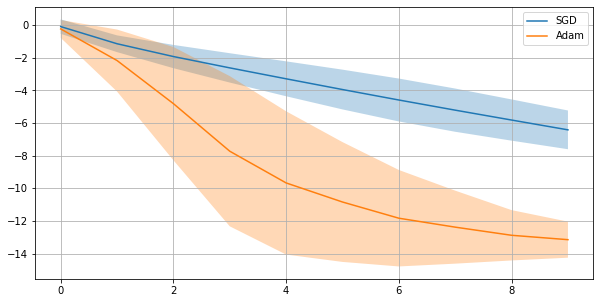

In [49]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.grid()
ax.fill_between(x=range(sgd_loss_mean.shape[0]),
                y1=sgd_loss_mean + sgd_loss_std,
                y2=sgd_loss_mean - sgd_loss_std,
                alpha=0.3)
ax.plot(sgd_loss_mean, label='SGD')
ax.fill_between(x=range(adam_loss_mean.shape[0]),
                y1=adam_loss_mean + adam_loss_std,
                y2=adam_loss_mean - adam_loss_std,
                alpha=0.3)
ax.plot(adam_loss_mean, label='Adam')
ax.legend()